<a href="https://colab.research.google.com/github/shoreey/Wine-Quality-Analysis-and-Prediction/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load the dataset
file_path = "E:/winequality.xlsx"
df = pd.read_excel(file_path)



In [ ]:
# Check the first few rows of the dataset
print(df.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  good color  
0      9.4        5     0   red  
1      9.8        

In [ ]:
# Summary statistics
print(df.describe())



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [ ]:
# Check for missing values
print(df.isnull().sum())



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64


In [ ]:
# Map 'color' column to numerical values
color_mapping = {'red': 0, 'white': 1}
df['color'] = df['color'].map(color_mapping)


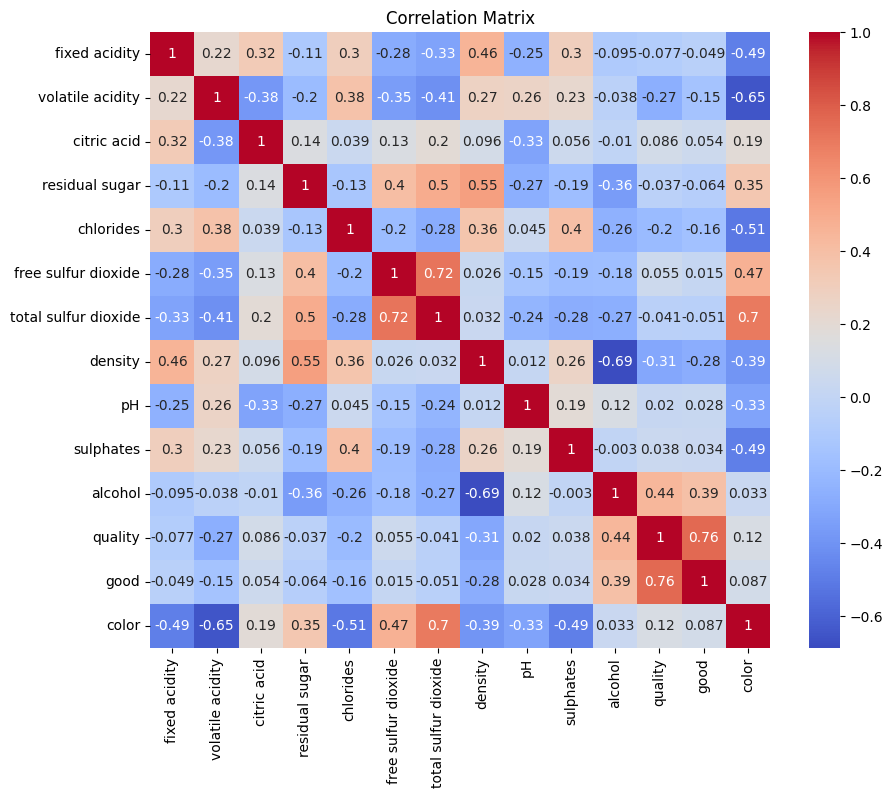

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
good                      -0.049447         -0.151714     0.054444   
color               

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)



C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


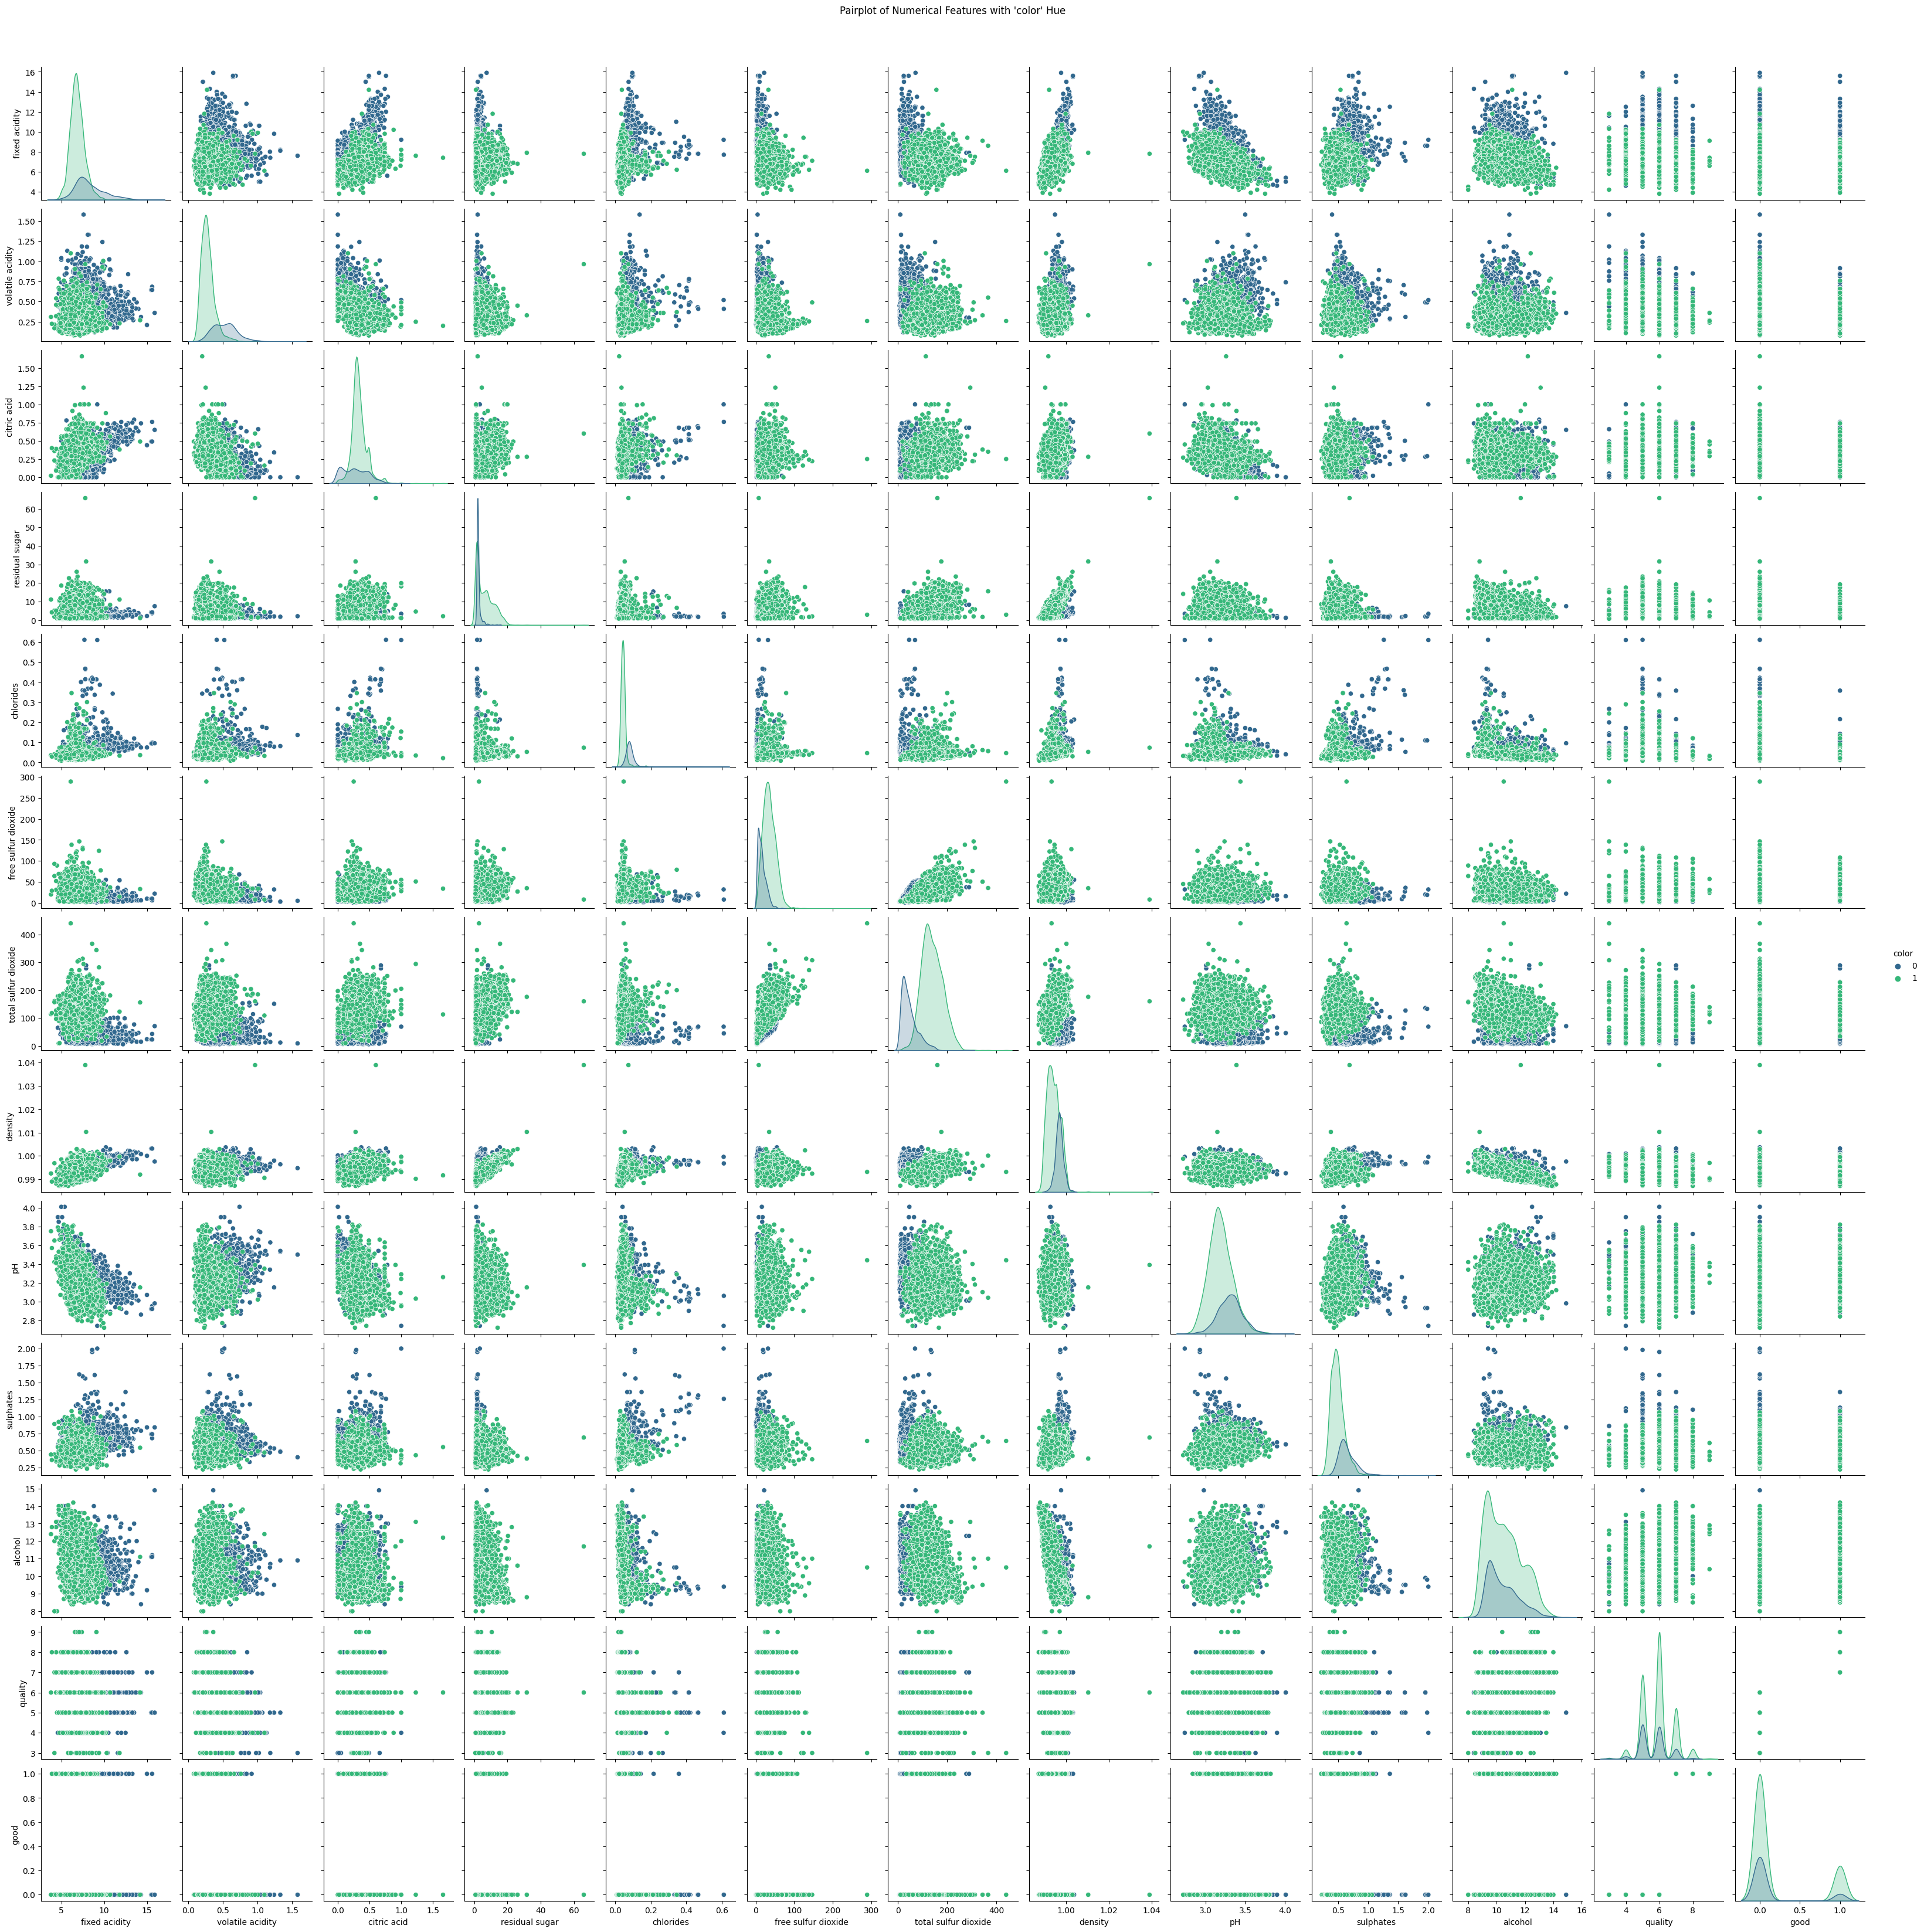

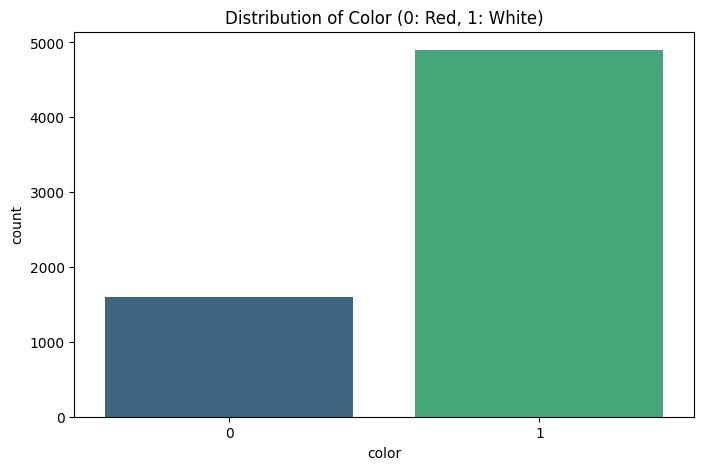

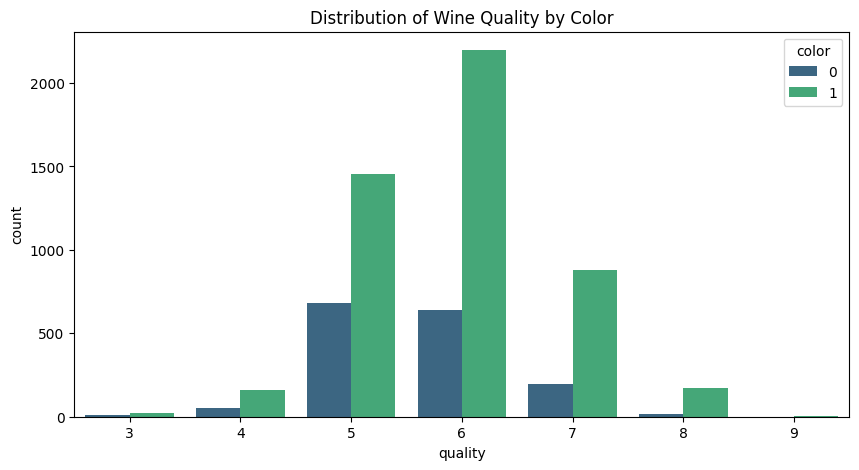

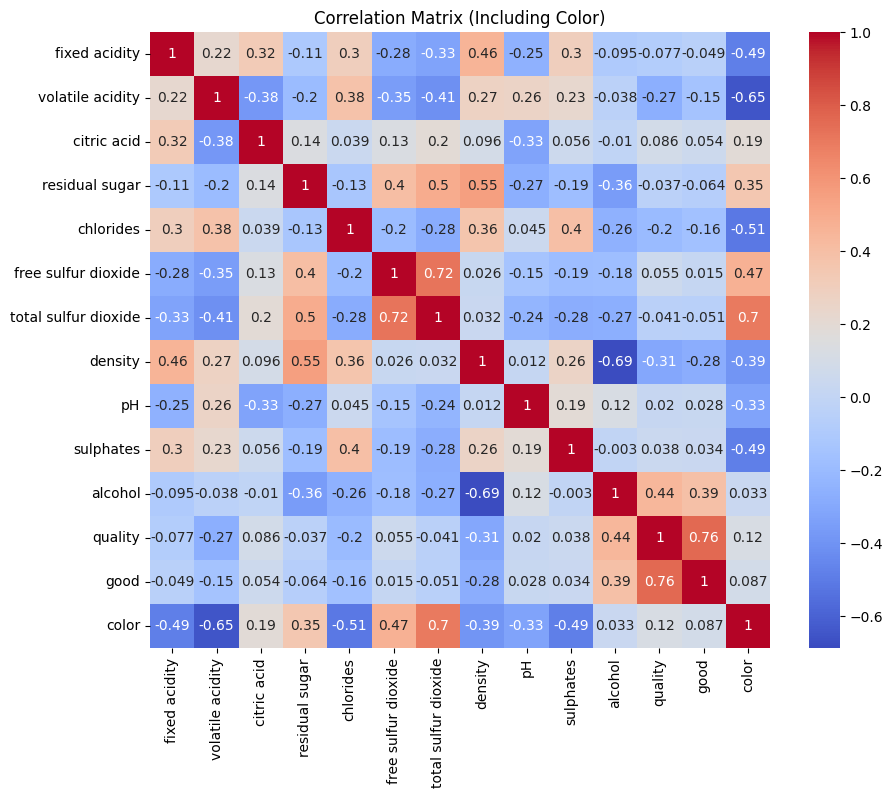

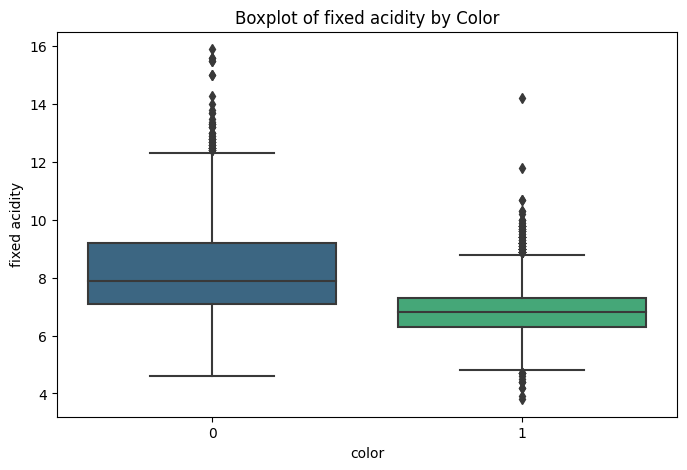

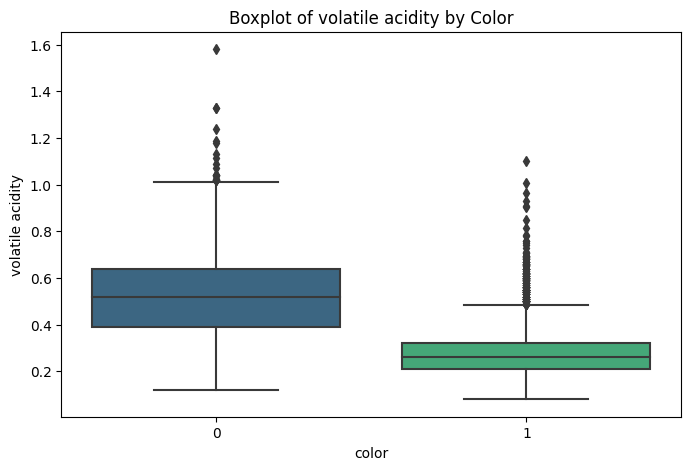

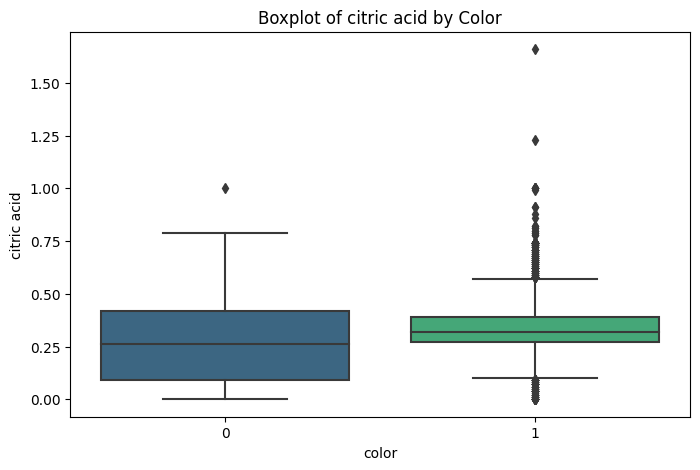

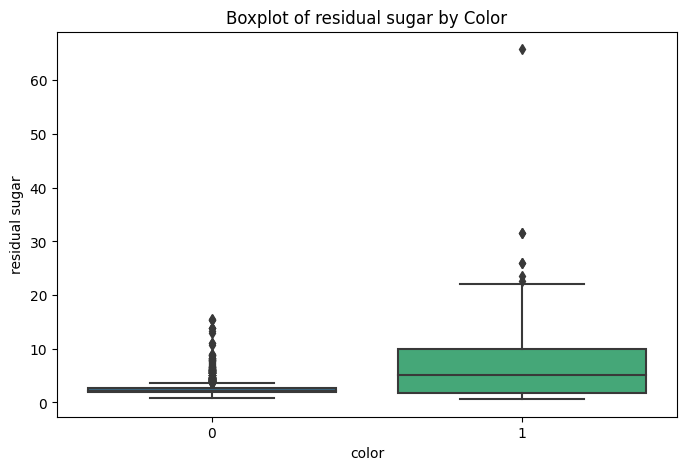

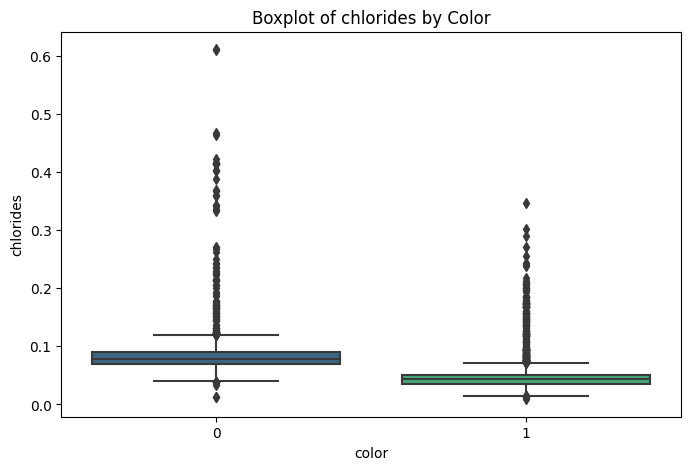

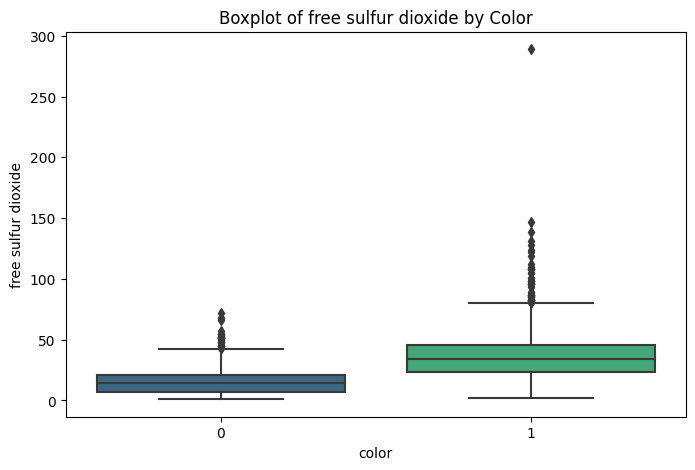

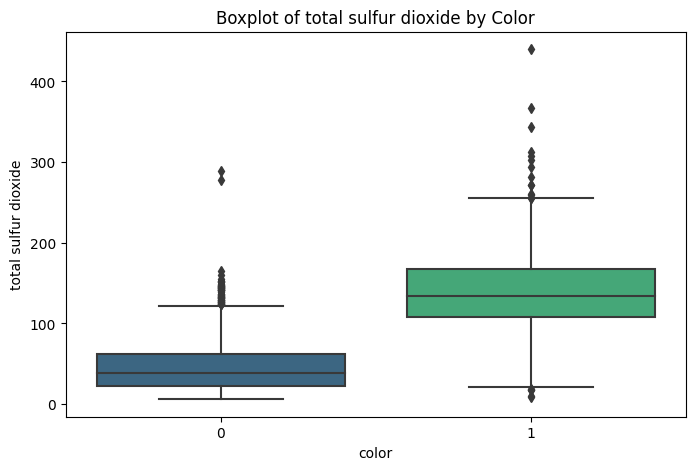

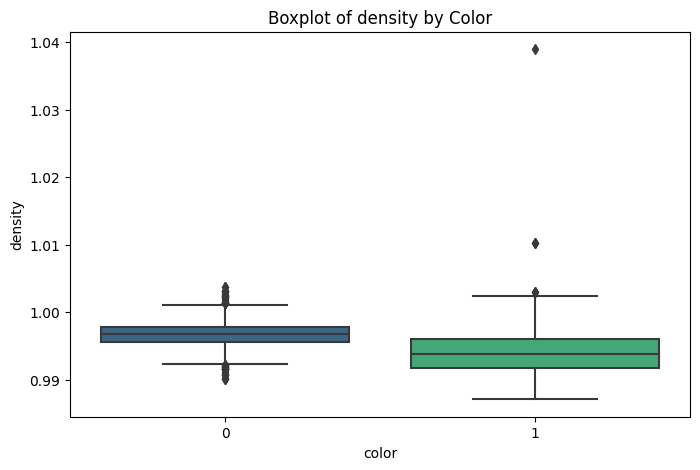

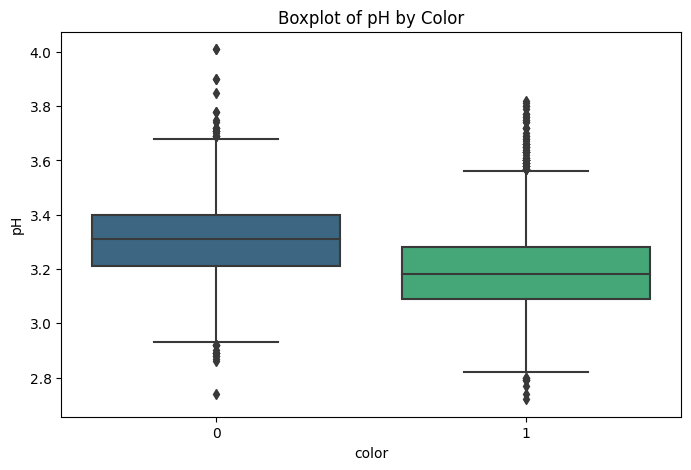

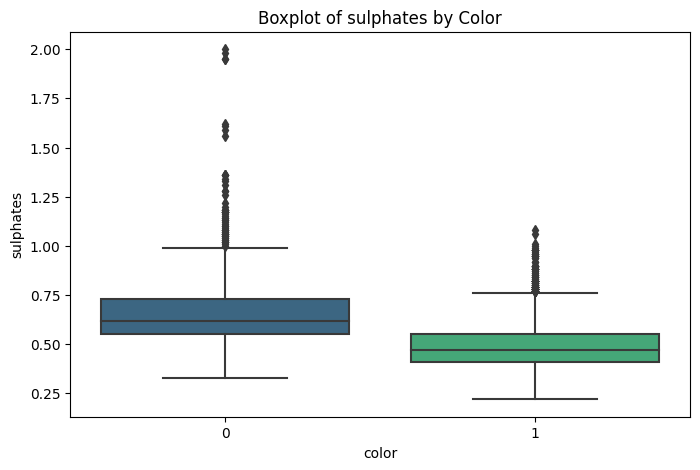

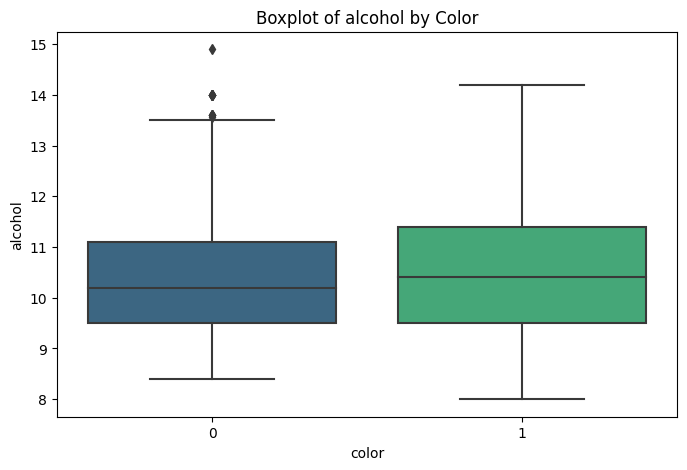

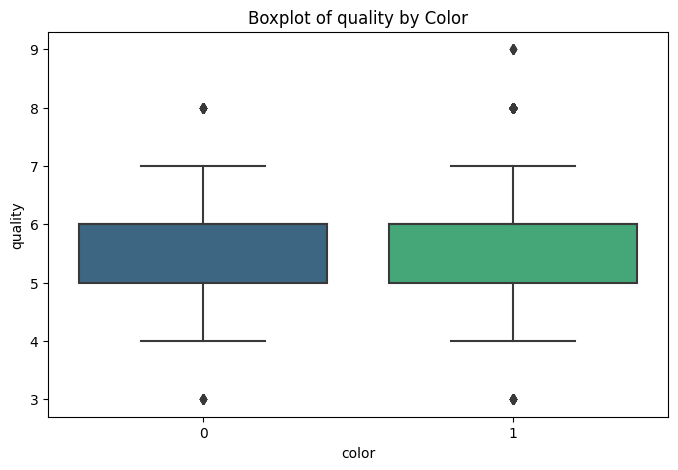

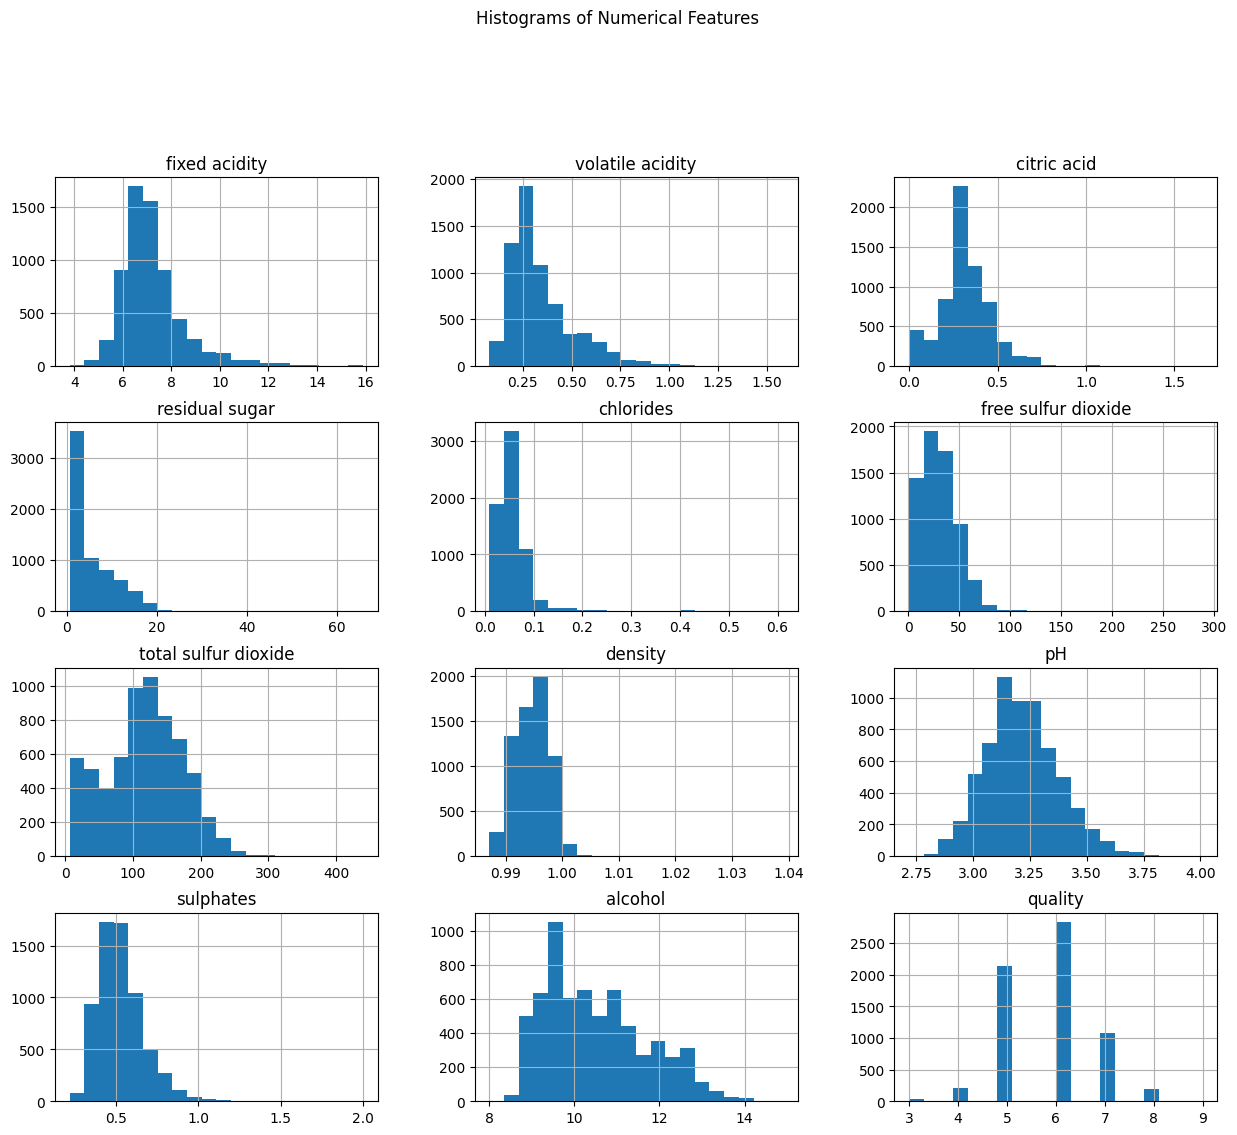

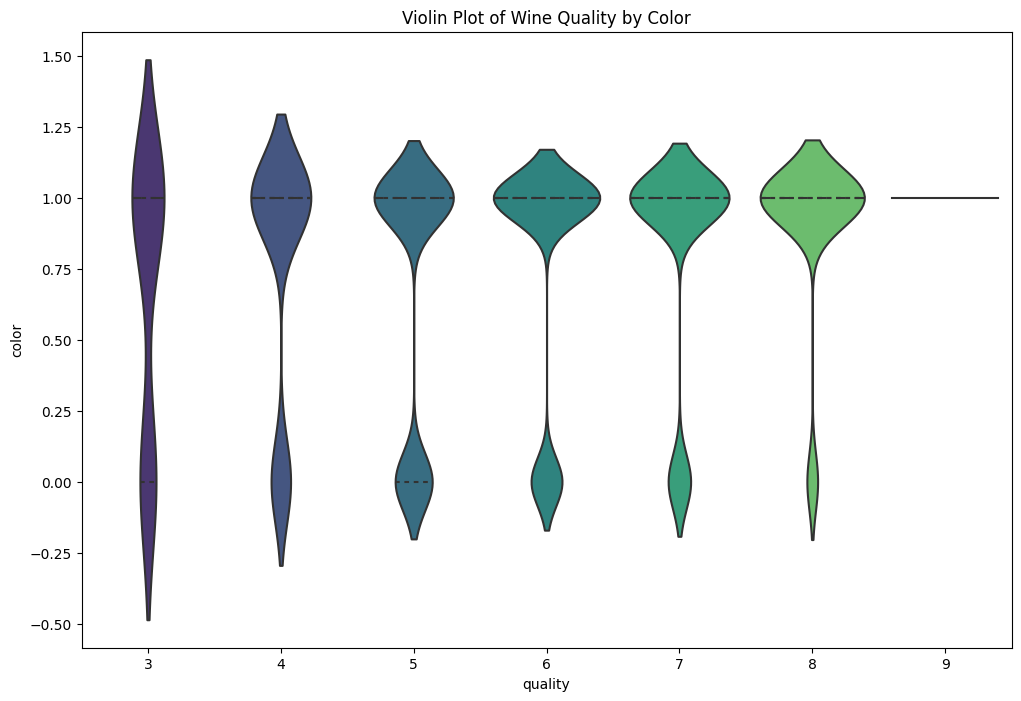

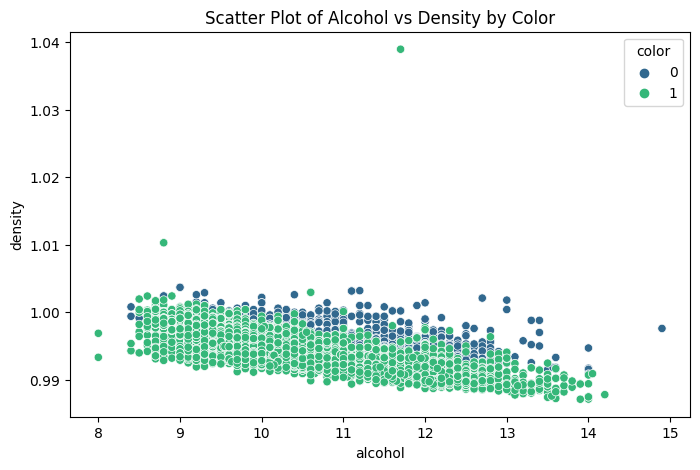

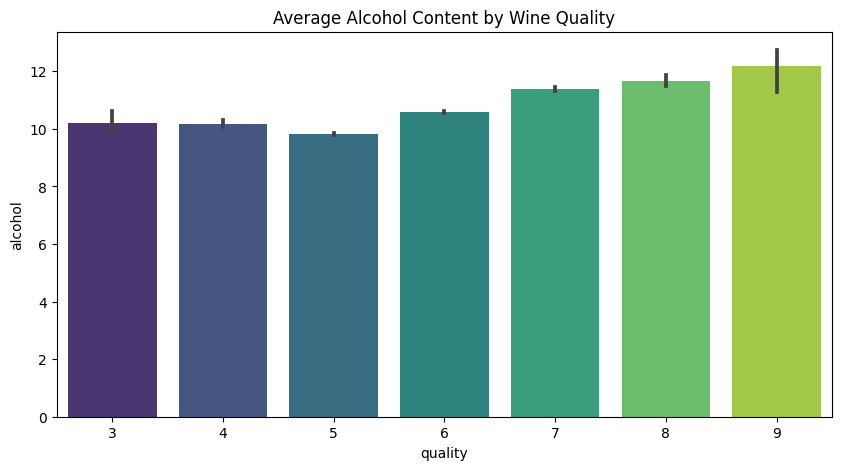

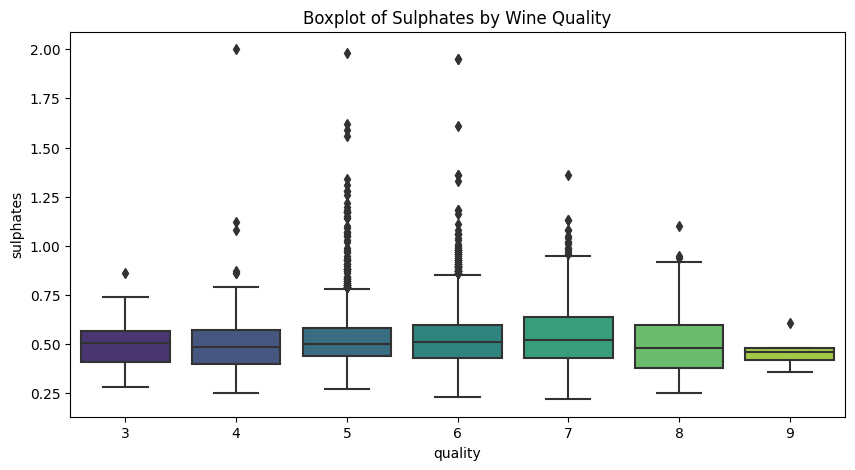

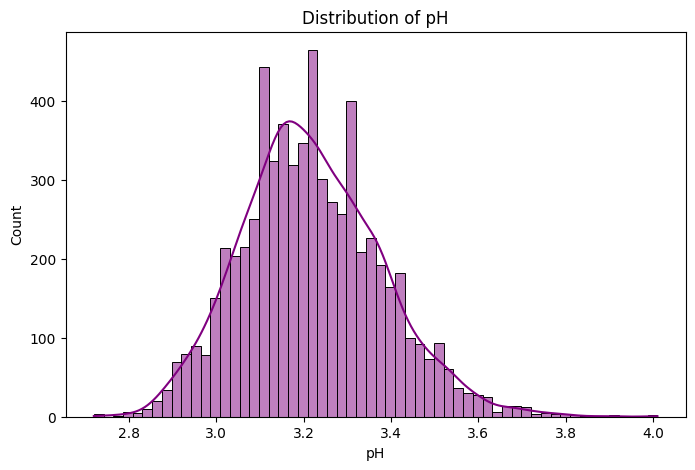

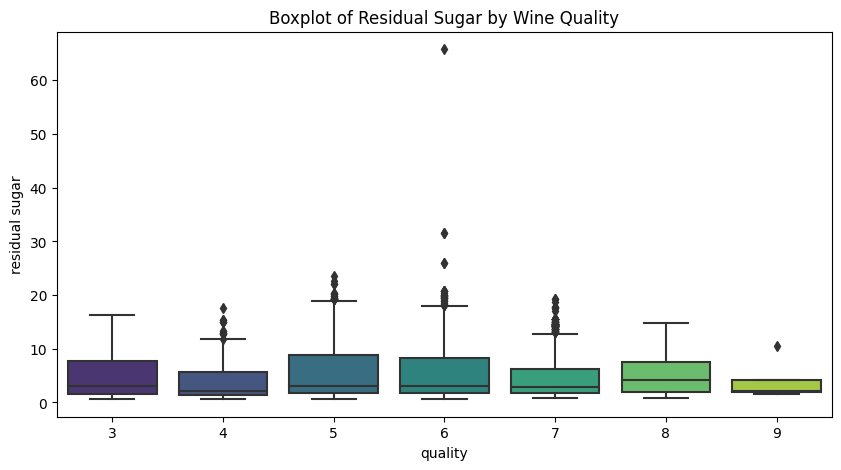

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


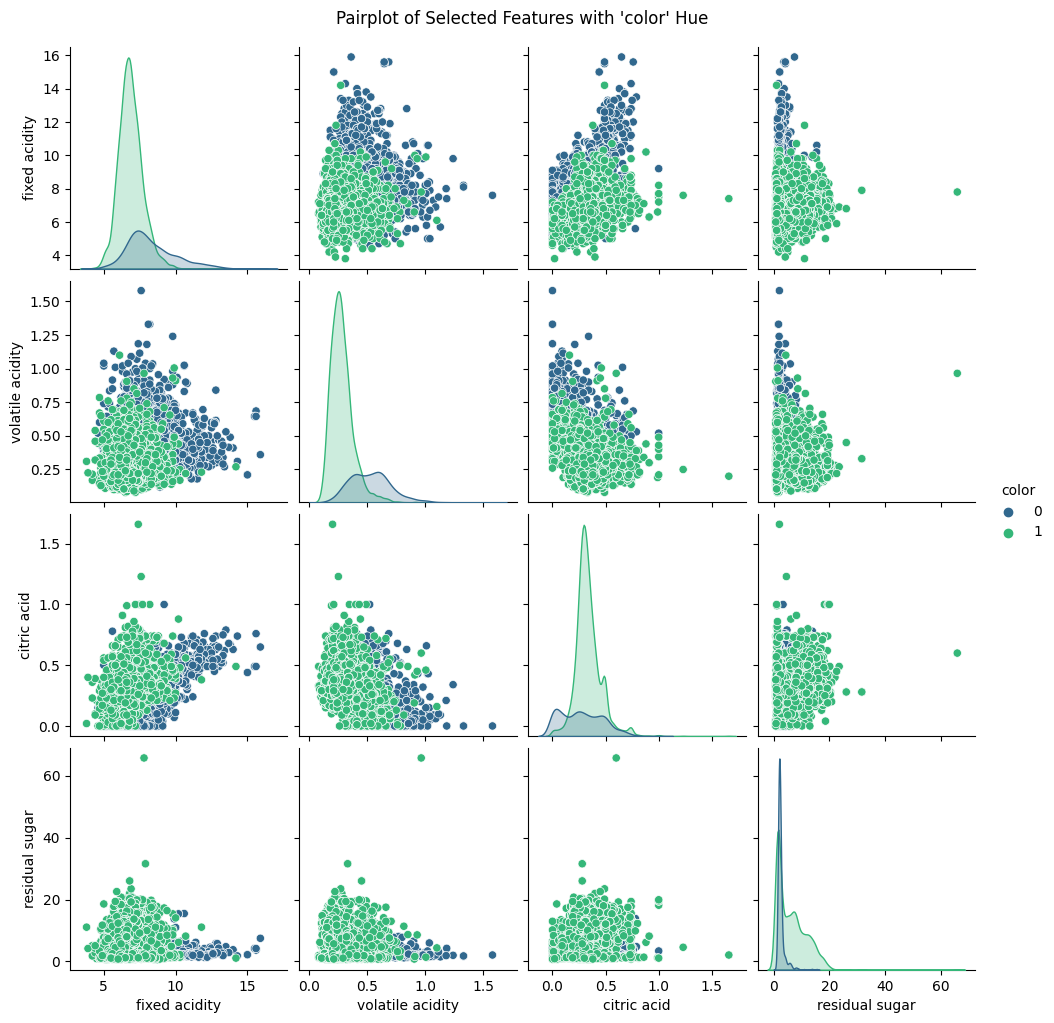

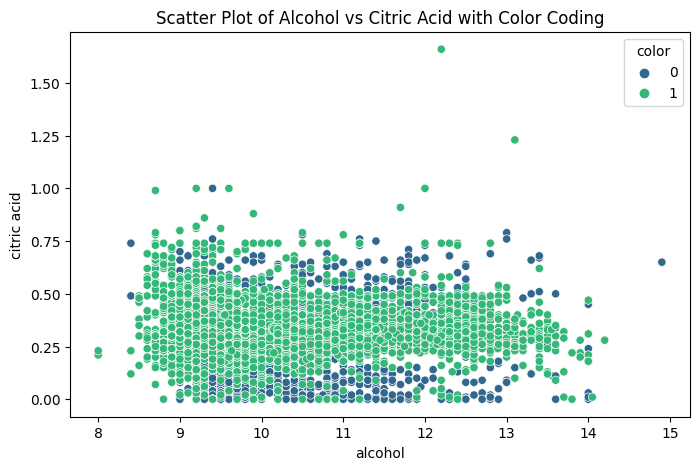

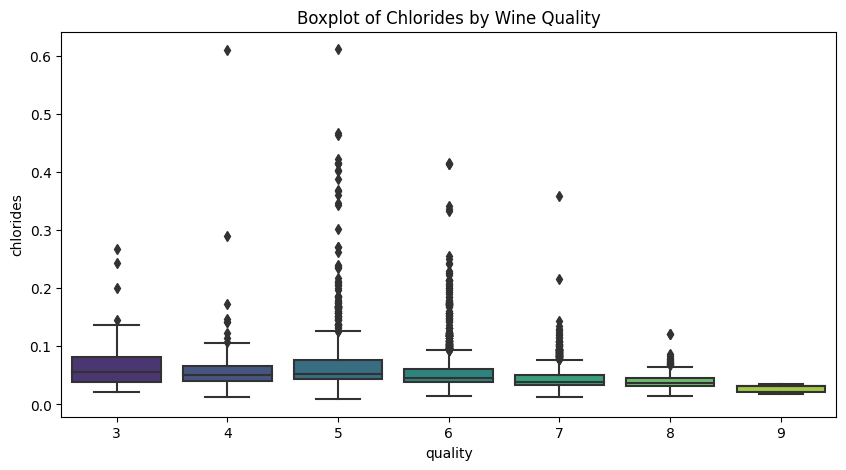

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


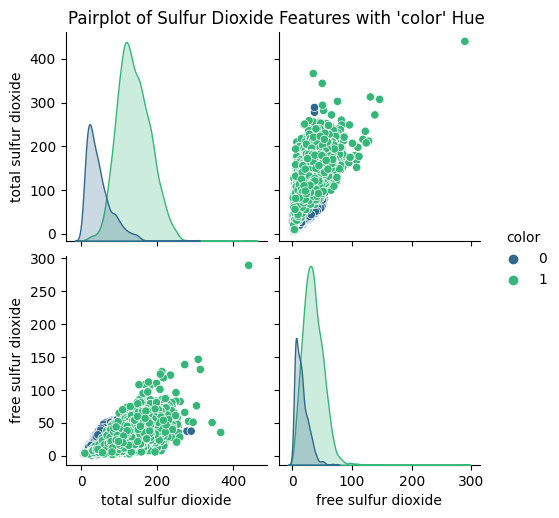

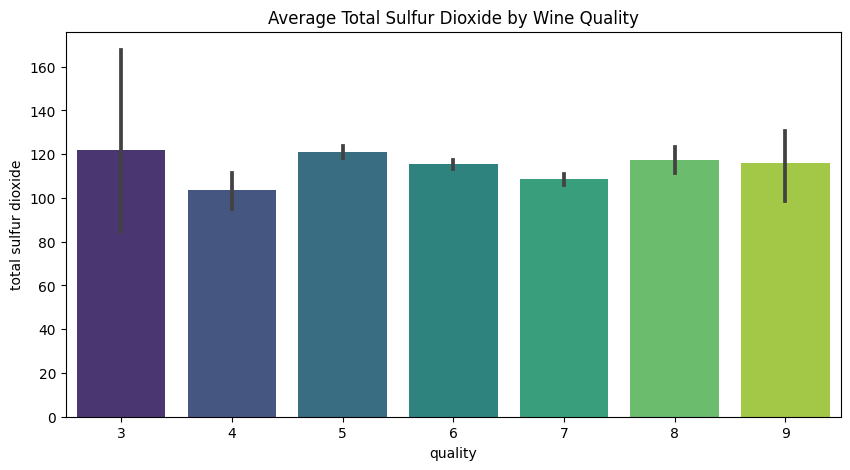

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot with hue 'color'
sns.pairplot(df, hue='color', palette='viridis')
plt.suptitle("Pairplot of Numerical Features with 'color' Hue", y=1.02)
plt.show()

# Distribution of 'color'
plt.figure(figsize=(8, 5))
sns.countplot(x='color', data=df, palette='viridis')
plt.title('Distribution of Color (0: Red, 1: White)')
plt.show()

# Distribution of 'quality' by color
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=df, hue='color', palette='viridis')
plt.title('Distribution of Wine Quality by Color')
plt.show()

# Correlation matrix with 'color' included
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Including Color)')
plt.show()

# Boxplots of numerical features by 'color'
numerical_columns = df.columns[:-2]  # Exclude 'quality' and 'good' columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='color', y=col, data=df, palette='viridis')
    plt.title(f'Boxplot of {col} by Color')
    plt.show()

# Histograms of numerical features
df[numerical_columns].hist(bins=20, figsize=(15, 12))
plt.suptitle('Histograms of Numerical Features', x=0.5, y=1.02)
plt.show()

# Violin plots of quality by color
plt.figure(figsize=(12, 8))
sns.violinplot(x='quality', y='color', data=df, palette='viridis', inner='quart')
plt.title('Violin Plot of Wine Quality by Color')
plt.show()

# Scatter plots of 'alcohol' vs 'density' for each color
plt.figure(figsize=(8, 5))
sns.scatterplot(x='alcohol', y='density', data=df, hue='color', palette='viridis')
plt.title('Scatter Plot of Alcohol vs Density by Color')
plt.show()

# Barplot of average 'alcohol' content by quality
plt.figure(figsize=(10, 5))
sns.barplot(x='quality', y='alcohol', data=df, palette='viridis')
plt.title('Average Alcohol Content by Wine Quality')
plt.show()

# Boxplots of 'sulphates' by quality
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='sulphates', data=df, palette='viridis')
plt.title('Boxplot of Sulphates by Wine Quality')
plt.show()

# Distribution of 'pH'
plt.figure(figsize=(8, 5))
sns.histplot(df['pH'], kde=True, color='purple')
plt.title('Distribution of pH')
plt.show()

# Boxplots of 'residual sugar' by quality
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='residual sugar', data=df, palette='viridis')
plt.title('Boxplot of Residual Sugar by Wine Quality')
plt.show()

# Pairplot of a subset of features
subset_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'color']
sns.pairplot(df[subset_features], hue='color', palette='viridis')
plt.suptitle("Pairplot of Selected Features with 'color' Hue", y=1.02)
plt.show()

# Scatter plot of 'alcohol' vs 'citric acid' with color coding
plt.figure(figsize=(8, 5))
sns.scatterplot(x='alcohol', y='citric acid', data=df, hue='color', palette='viridis')
plt.title('Scatter Plot of Alcohol vs Citric Acid with Color Coding')
plt.show()

# Boxplots of 'chlorides' by quality
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='chlorides', data=df, palette='viridis')
plt.title('Boxplot of Chlorides by Wine Quality')
plt.show()

# Pairplot of 'total sulfur dioxide' and 'free sulfur dioxide' by color
sns.pairplot(df[['total sulfur dioxide', 'free sulfur dioxide', 'color']], hue='color', palette='viridis')
plt.suptitle("Pairplot of Sulfur Dioxide Features with 'color' Hue", y=1.02)
plt.show()

# Barplot of average 'total sulfur dioxide' by quality
plt.figure(figsize=(10, 5))
sns.barplot(x='quality', y='total sulfur dioxide', data=df, palette='viridis')
plt.title('Average Total Sulfur Dioxide by Wine Quality')
plt.show()


# Modelling

# K-mean clustering

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anac

Best k: 1
Best Accuracy: 0.7161538461538461
Best Precision: 0.7198199250928593
Best Recall: 0.7161538461538461


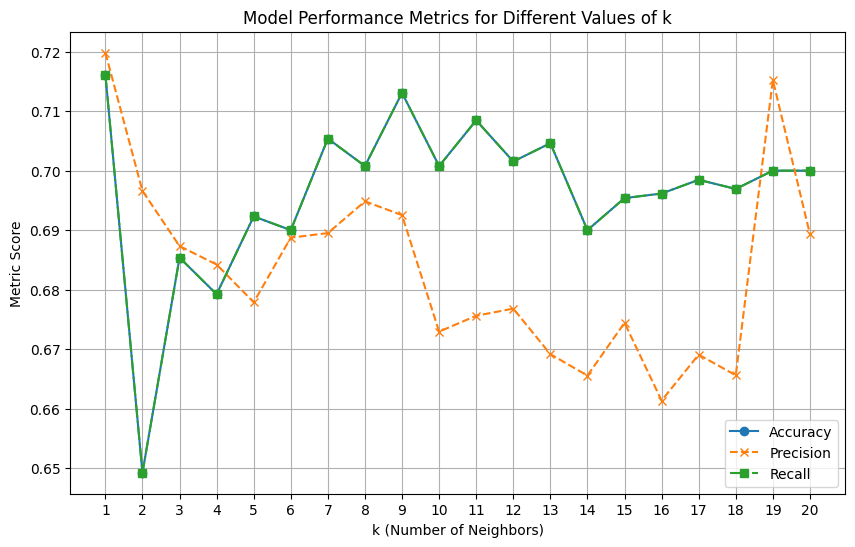

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Define features (X) and target variable (y)
X = df.drop(['quality'], axis=1)
y = df['quality']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store performance metrics for different values of k
k_values = list(range(1, 21))
accuracy_scores = []
precision_scores = []
recall_scores = []

# Initialize variables to store the best k and corresponding metrics
best_k = 0
best_accuracy = 0
best_precision = 0
best_recall = 0

# Iterate through different values of k
for k in k_values:
    # Create and train the k-NN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Check if the current k is better than the previous best k
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall

# Print the best k and corresponding metrics
print(f'Best k: {best_k}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best Precision: {best_precision}')
print(f'Best Recall: {best_recall}')

# Plot accuracy, precision, and recall for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', label='Accuracy', linestyle='-')
plt.plot(k_values, precision_scores, marker='x', label='Precision', linestyle='--')
plt.plot(k_values, recall_scores, marker='s', label='Recall', linestyle='-.')

plt.title('Model Performance Metrics for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Metric Score')
plt.legend()
plt.grid()
plt.xticks(np.arange(1, 21, 1))
plt.show()


# Neural Network

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 1.1473 - accuracy: 0.5873 - val_loss: 0.7727 - val_accuracy: 0.6808
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.7171 - accuracy: 0.7008 - val_loss: 0.7170 - val_accuracy: 0.6808
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.7083 - val_loss: 0.7096 - val_accuracy: 0.6869
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7191 - val_loss: 0.7001 - val_accuracy: 0.7023
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7187 - val_loss: 0.6901 - val_accuracy: 0.6977
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.7223 - val_loss: 0.6774 - val_accuracy: 0.7069
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7191 - val_loss: 0.6784 - val_accuracy: 0.7085
Epoch 

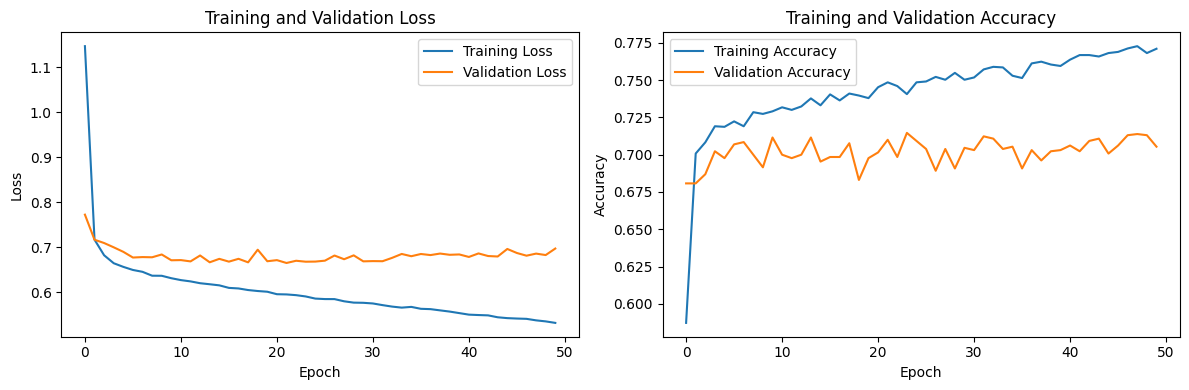

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Define features (X) and target variable (y)
X = df.drop(['quality'], axis=1)
y = df['quality']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert wine quality into a categorical variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create a neural network model
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


# Tuining the Model

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best k: 15
Best Weight: distance
Best p: 1
Test Accuracy: 0.7762
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.69      0.72      0.71       402
           6       0.79      0.82      0.80       597
           7       0.89      1.00      0.94       215
           8       1.00      0.31      0.47        36
           9       0.00      0.00      0.00         1

    accuracy                           0.78      1300
   macro avg       0.58      0.42      0.45      1300
weighted avg       0.77      0.78      0.76      1300



C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


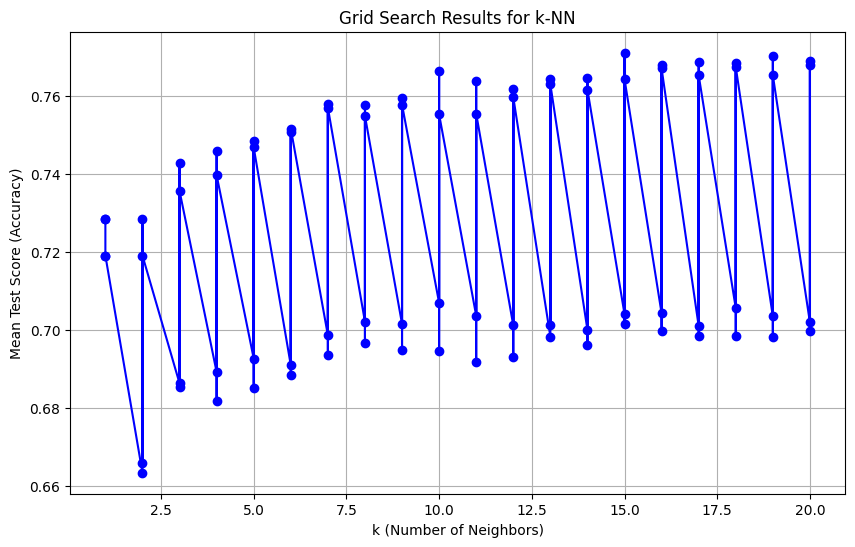

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a grid of hyperparameters for k-NN
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the grid search model
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_weight = best_params['weights']
best_p = best_params['p']

# Create and train the k-NN model with the best parameters
knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weight, p=best_p)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best k: {best_k}')
print(f'Best Weight: {best_weight}')
print(f'Best p: {best_p}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Classification Report:\n{report}')

# Plot the grid search results
results = grid_search.cv_results_
k_values = [param['n_neighbors'] for param in results['params']]
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.title('Grid Search Results for k-NN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.grid()
plt.show()
